# Ridge Regression

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [14]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

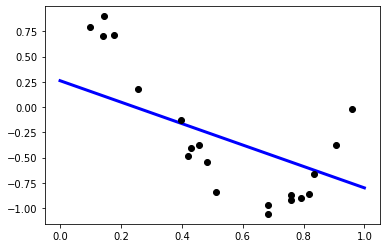

In [15]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


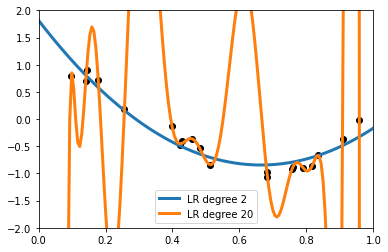

In [16]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001


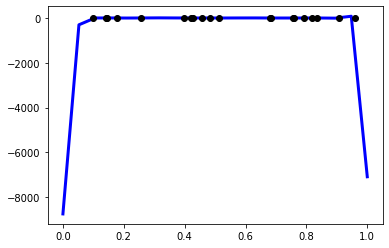

In [18]:
model1 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model1.fit(x, y)

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

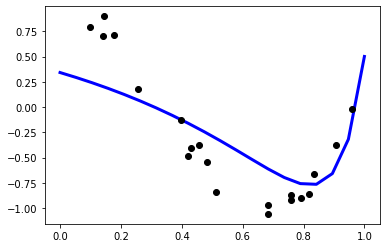

In [19]:
model2 = make_pipeline(PolynomialFeatures(20), Ridge(alpha=1.0))
model2.fit(x, y)

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

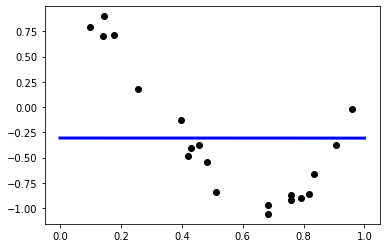

In [20]:
model3 = make_pipeline(PolynomialFeatures(20), Ridge(alpha=10000))
model3.fit(x, y)

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, model3.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

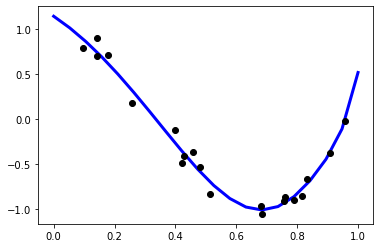

In [21]:
model4 = make_pipeline(PolynomialFeatures(20), Ridge(alpha=0.0001))
model4.fit(x, y)

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, model4.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha za pomocą komendy **GridSearchCV**. 

In [22]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'ridge__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 4, 'ridge__alpha': 0.001}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [23]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'ridge__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(X, y)
grid.best_params_
grid.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.1201e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.57247e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.92984e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.8127e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio

0.990395515130343